<a href="https://colab.research.google.com/github/chidambarambaskaran/MachineLearning/blob/main/PipeLine_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

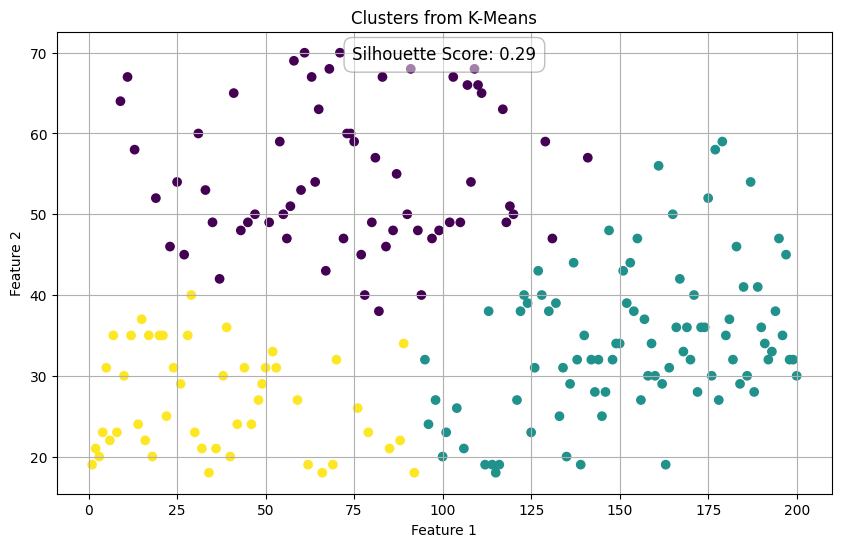

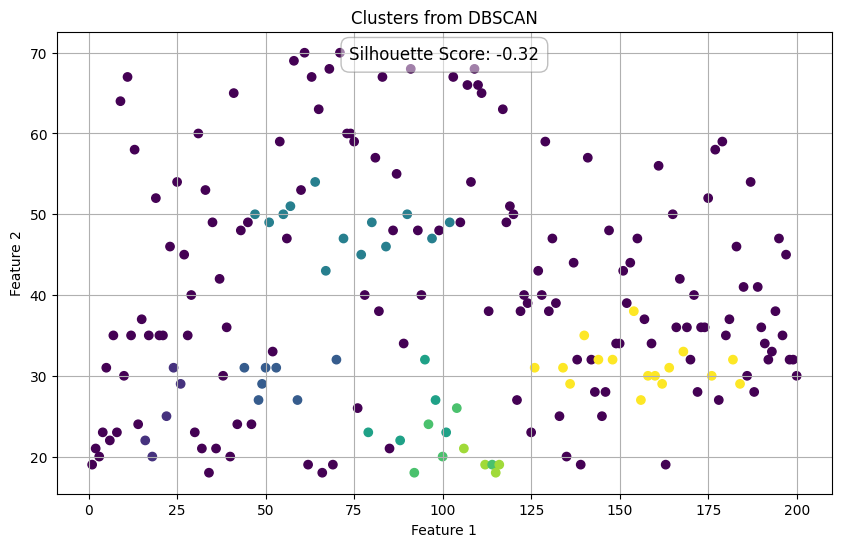

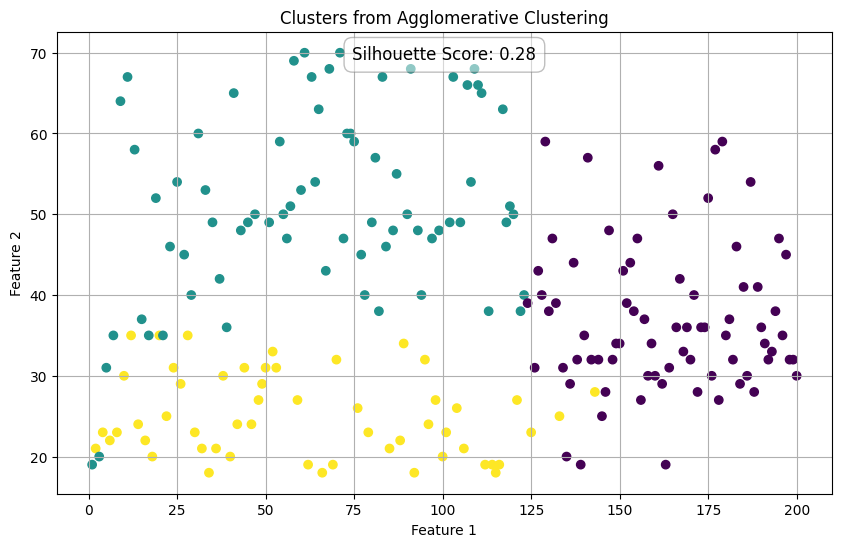

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score

data = pd.read_csv('Mall_Customers.csv')

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

models = {
    'K-Means': KMeans(n_clusters=3, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3)
}

def plot_clusters(data, labels, model_name, silhouette_score=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f'Clusters from {model_name}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    if silhouette_score is not None:
        plt.text(0.5, 0.95, f'Silhouette Score: {silhouette_score:.2f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.5'))

    plt.grid()
    plt.show()

for model_name, model in models.items():
    clustering_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clusterer', model)
    ])

    clustering_pipeline.fit(data)

    labels = clustering_pipeline.named_steps['clusterer'].labels_ if hasattr(model, 'labels_') else clustering_pipeline.predict(data)

    data[f'{model_name} Labels'] = labels

    if hasattr(model, 'labels_'):
        silhouette_avg = silhouette_score(data[numerical_cols], labels) if len(set(labels)) > 1 else -1
    else:
        silhouette_avg = None

    if len(numerical_cols) >= 2:
        plot_clusters(data[numerical_cols], labels, model_name, silhouette_score=silhouette_avg)
    else:
        print(f"Not enough numerical features for plotting {model_name}.")
